In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/swiggy-restraurant-and-item-full-datasets/Swiggy.csv
/kaggle/input/india-geojson/states_india.geojson
/kaggle/input/zomato-restaurants-dataset-for-metropolitan-areas/zomato_dataset.csv
/kaggle/input/india-shape/India_State_Boundary.shp
/kaggle/input/swiggy-restuarant-dataset/swiggy.csv
/kaggle/input/india-shx/india_States_level_1.prj
/kaggle/input/india-shx/india_States_level_1.shp
/kaggle/input/india-shx/india_States_level_1.shx
/kaggle/input/india-shx/india_States_level_1.dbf
/kaggle/input/zomato-restaurants-dataset/zomato.csv


# Descriptive Statistics

In [2]:
zomato2 = pd.read_csv("/kaggle/input/zomato-restaurants-dataset/zomato.csv")
swiggy1 = pd.read_csv("/kaggle/input/swiggy-restraurant-and-item-full-datasets/Swiggy.csv", low_memory = False)
swiggy2 = pd.read_csv("/kaggle/input/swiggy-restuarant-dataset/swiggy.csv")

In [3]:
zomato2.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [4]:
swiggy1.head()

,city,city link,subcity,subcity link,restaurant code,restaurant,rating,rating count,cost,address,cuisine,licension no,restaurant link,menu,item,price,veg_or_non_veg
0,Abohar,https://www.swiggy.com/city/abohar,NaN,NaN,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,Burger,Aloo Tikki Burger,40,Veg
1,Abohar,https://www.swiggy.com/city/abohar,NaN,NaN,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,Burger,Veg Creamy Burger,50,Veg
2,Abohar,https://www.swiggy.com/city/abohar,NaN,NaN,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,Burger,Cheese Burst Burger,65,Veg
3,Abohar,https://www.swiggy.com/city/abohar,NaN,NaN,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,Burger,Paneer Creamy Burger,80,Veg
4,Abohar,https://www.swiggy.com/city/abohar,NaN,NaN,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,Burger,Maxican Burger,80,Veg


In [5]:
swiggy2.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


# Removing unnecesarry columns

In [6]:
# Removing unnecessary columns
remove = ["Unnamed: 0.1", "Unnamed: 0", "restaurant name", "area", "local address"]
zomato2 = zomato2.drop(remove, axis = 1)
print(zomato2.shape)
zomato2.head()

(7105, 7)


,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type
0,Quick Bites,3.4,7,200.0,No,No,Fast Food
1,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages"
2,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages"
3,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese"
4,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever..."


In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
zomato2["restaurant type"] = label.fit_transform(zomato2["restaurant type"])
zomato2["online_order"] = label.fit_transform(zomato2["online_order"])
zomato2["table booking"] = label.fit_transform(zomato2["table booking"])
zomato2.head()

,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type
0,68,3.4,7,200.0,0,0,Fast Food
1,68,3.9,48,400.0,1,0,"Fast Food, Beverages"
2,14,3.7,37,400.0,1,0,"Cafe, Beverages"
3,21,2.7,135,550.0,1,0,"Biryani, Mughlai, Chinese"
4,21,2.8,40,700.0,1,0,"BBQ, Continental, North Indian, Chinese, Bever..."


In [8]:
zomato2["rate (out of 5)"] = zomato2["rate (out of 5)"].fillna(zomato2["rate (out of 5)"].mean())
zomato2["avg cost (two people)"] = zomato2["avg cost (two people)"].fillna(zomato2["avg cost (two people)"].mean())

In [9]:
zomato2[np.isnan(zomato2["avg cost (two people)"])]

,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type


In [10]:
for i in zomato2.columns:
    print(f"{i}: {zomato2[i].nunique()}")

restaurant type: 81
rate (out of 5): 32
num of ratings: 935
avg cost (two people): 66
online_order: 2
table booking: 2
cuisines type: 2175


In [11]:
remove = ["city link", "subcity", "subcity link", "restaurant code", "restaurant", "address", "licension no", "restaurant link", "menu","item", "price", "rating count", "cost", "cuisine", "veg_or_non_veg"]
swiggy1 = swiggy1.drop(remove, axis = 1)
print(swiggy1.shape)
swiggy1.head()

(13405384, 2)


,city,rating
0,Abohar,--
1,Abohar,--
2,Abohar,--
3,Abohar,--
4,Abohar,--


In [12]:
swiggy1["rating"] = swiggy1["rating"].replace('--', 0)
swiggy1["rating"] = swiggy1["rating"].replace(' THUKALASSERY THIRUVALLA"', 0)
swiggy1["rating"] = pd.to_numeric(swiggy1["rating"])
swiggy1["rating"].unique()

array([0. , 4.4, 3.8, 3.7, 3.6, 4. , 4.2, 4.7, 4.1, 3.5, 3.1, 3.4, 3.3,
       4.8, 3.9, 2.7, 4.3, 2.9, 4.5, 2.5, 3.2, 2.4, 4.6, 3. , 2.8, 2.3,
       5. , 2.6, 2.2, 1.4, 1.9, 4.9, 2.1, 1.3, 2. , 1.8, 1.6, 1.1, 1.5,
       1. , 1.2, 1.7])

In [13]:
swiggy1 = swiggy1.groupby("city").mean()
swiggy1.head()

,rating
city,
Abohar,1.312480
Adilabad,2.835007
Adityapur,2.622412
Adoni,2.493862
Agartala,3.272454


In [14]:
from geopy.geocoders import Nominatim

# Initialize a geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode a city and return its latitude and longitude
def geocode_city(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [15]:
lati = []
longi = []
for i in swiggy1.index:
    try:
        lat, long = geocode_city(i)
    except:
        print(i)
        lati.append(None)
        longi.append(None)
        continue
    lati.append(lat)
    longi.append(long)
swiggy1["Latitude"] = lati
swiggy1["Longitude"] = longi
swiggy1.head()

Pala


,rating,Latitude,Longitude
city,,,
Abohar,1.312480,30.145054,74.195660
Adilabad,2.835007,19.675945,78.533990
Adityapur,2.622412,22.792542,86.085518
Adoni,2.493862,15.655919,77.269774
Agartala,3.272454,23.831238,91.282382


In [16]:
swiggy1 = swiggy1.drop("Pala")

In [17]:
import folium
from folium.plugins import HeatMap
import math


# Create a HeatMap layer using latitude, longitude, and average ratings
heat_data = [[row['Latitude'], row['Longitude'], row['rating']] for index, row in swiggy1.iterrows()]
count = 0
remove = []
for i in range(len(heat_data)):
    if math.isnan(float(heat_data[i][0])) or math.isnan(float(heat_data[i][1])):
        remove.append(i)

for i in remove:
    heat_data.pop(i - count)
    count += 1

In [18]:
for i in swiggy1.columns:
    print(f"{i}: {swiggy1[i].nunique()}")

rating: 536
Latitude: 543
Longitude: 545


In [19]:
remove = ["ID", "Area", "Restaurant", "Address", "Delivery time", "City"]
swiggy2 = swiggy2.drop(remove, axis = 1)
print(swiggy2.shape)
swiggy2.head()

(8680, 4)


,Price,Avg ratings,Total ratings,Food type
0,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian"
1,300.0,4.1,100,"Mughlai,Lucknowi"
2,650.0,4.4,100,Chinese
3,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese"
4,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser..."


In [20]:
for i in swiggy2.columns:
    print(f"{i}: {swiggy2[i].nunique()}")

Price: 120
Avg ratings: 30
Total ratings: 8
Food type: 3734


# Distribution of each Variable

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


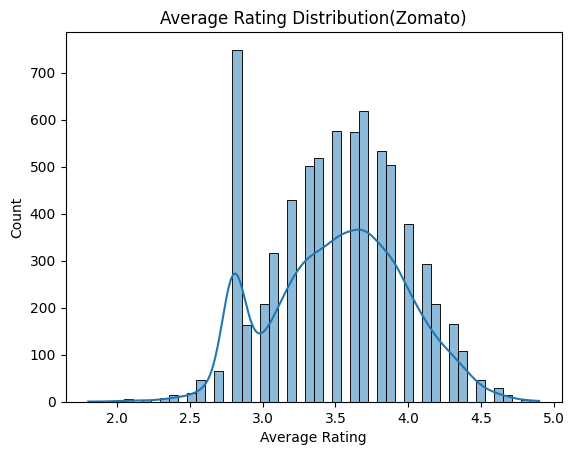

In [21]:
# Distribution of Average Rating
ax = sns.histplot(x = "rate (out of 5)", data = zomato2, kde = True).set(title='Average Rating Distribution(Zomato)', xlabel = "Average Rating")
#plt.savefig("Avg_rating_dist.png")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


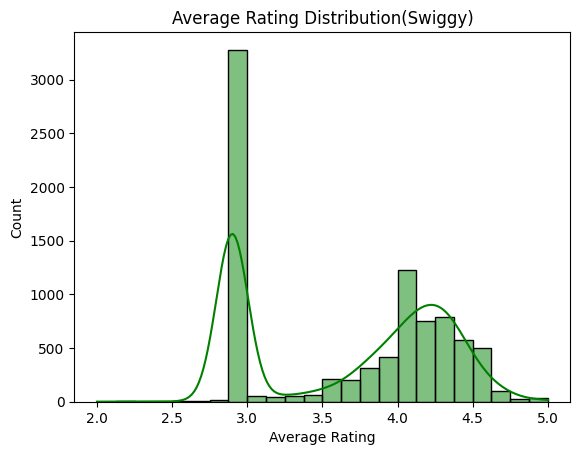

In [22]:
ax = sns.histplot(x = "Avg ratings", data = swiggy2, color = "green", kde = True).set(title='Average Rating Distribution(Swiggy)', xlabel = "Average Rating")
#plt.savefig("Avg_rating_dist(swiggy).png")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


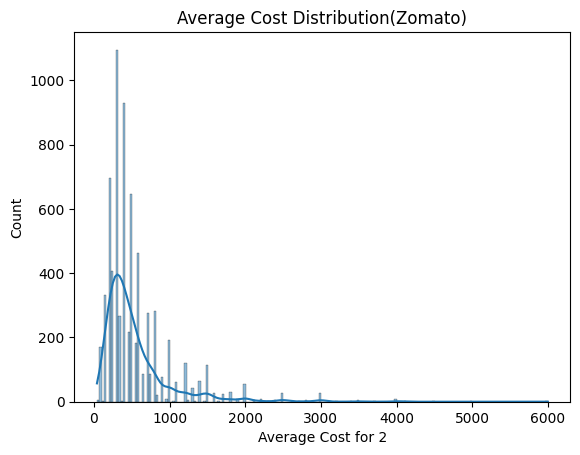

In [23]:
# Checking the Average price of 2 distrbution
sns.histplot(x = "avg cost (two people)", data = zomato2, kde = True).set(title='Average Cost Distribution(Zomato)', xlabel = "Average Cost for 2")
#plt.savefig("Avg_cost(zom).png")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


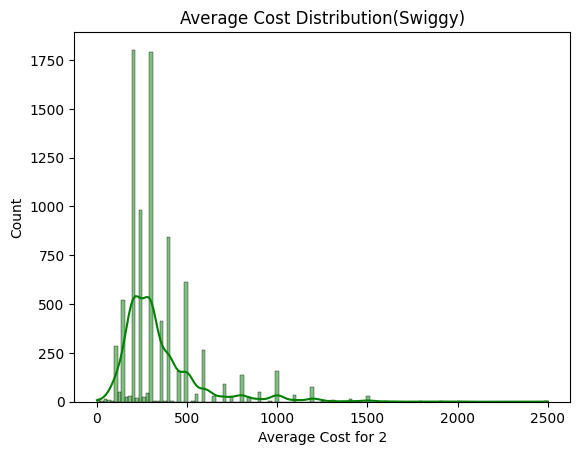

In [24]:
sns.histplot(x = "Price", data = swiggy2, color = "green", kde = True).set(title='Average Cost Distribution(Swiggy)', xlabel = "Average Cost for 2")
#plt.savefig("Avg_cost(zom).png")
plt.show()

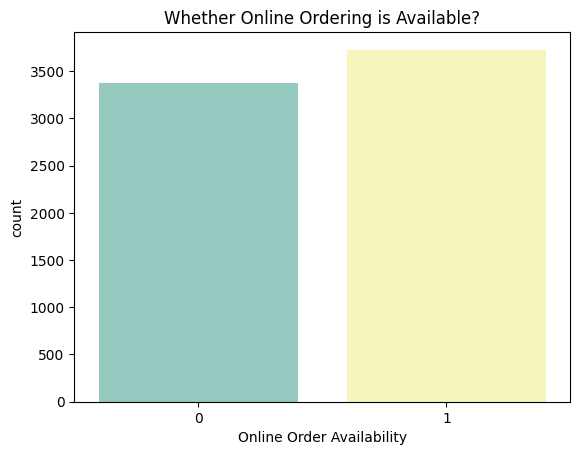

In [25]:
# Frequency count for Online order
sns.countplot(x = "online_order", data = zomato2, palette = "Set3").set(title='Whether Online Ordering is Available?', xlabel = "Online Order Availability")
#plt.savefig("online_order.png")
plt.show()

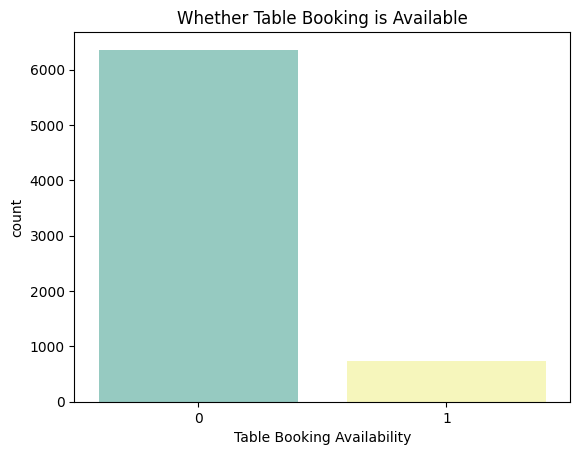

In [26]:
# Frequency count for Table booking
sns.countplot(x = "table booking", data = zomato2, palette = "Set3").set(title='Whether Table Booking is Available', xlabel = "Table Booking Availability")
#plt.savefig("table_booking.png")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


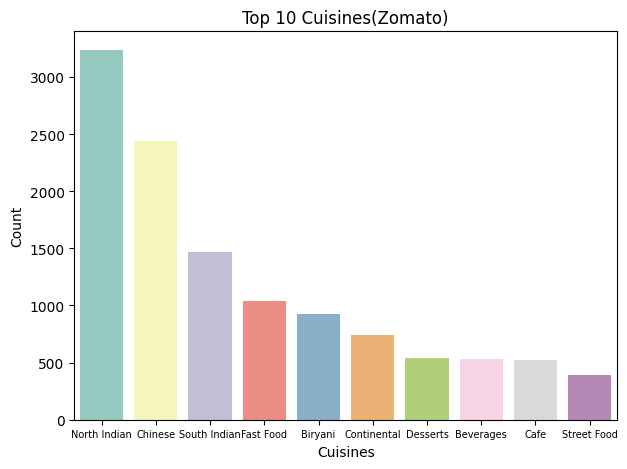

In [27]:
# Now we try to determine the distribution of cuisine type
from operator import itemgetter

cuisines = {}
for i in zomato2["cuisines type"].values:
    for j in i.split(", "):
        if j not in cuisines:
            cuisines[j] = 0
        cuisines[j] += 1
res = dict(sorted(cuisines.items(), key=itemgetter(1), reverse=True)[:10])
ax = sns.barplot(x = list(res.keys()), y = list(res.values()), palette = "Set3")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set(title = "Top 10 Cuisines(Zomato)", xlabel = "Cuisines", ylabel = "Count")
plt.tight_layout()
#plt.savefig("top_10_zomato")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


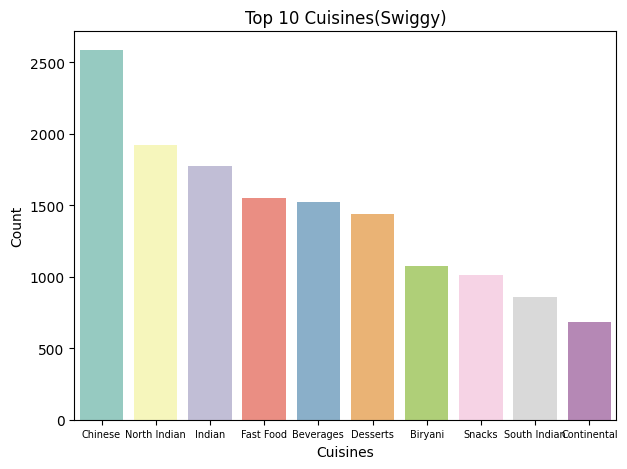

In [28]:
cuisines = {}
for i in swiggy2["Food type"].values:
    for j in i.split(","):
        if j not in cuisines:
            cuisines[j] = 0
        cuisines[j] += 1
res = dict(sorted(cuisines.items(), key=itemgetter(1), reverse=True)[:10])
ax = sns.barplot(x = list(res.keys()), y = list(res.values()), palette = "Set3")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set(title = "Top 10 Cuisines(Swiggy)", xlabel = "Cuisines", ylabel = "Count")
plt.tight_layout()
#plt.savefig("top_10_swiggy")
plt.show()

# Correlation Analysis

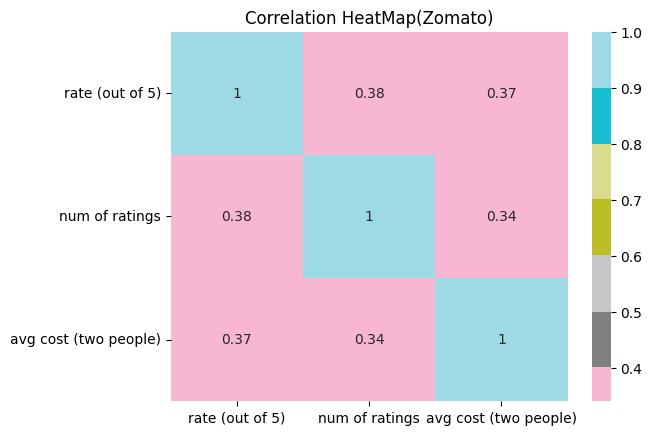

In [29]:
# Zomato
between = ["rate (out of 5)", "num of ratings", "avg cost (two people)"]
corr = zomato2[between].corr()
sns.heatmap(corr, annot = True, cmap = "tab20", center = 0).set(title = "Correlation HeatMap(Zomato)")
plt.savefig("zom_cor.png")

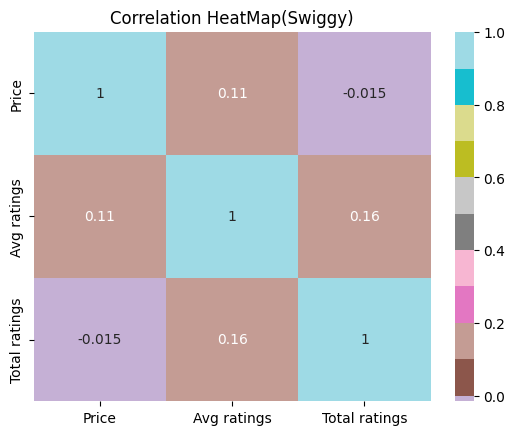

In [30]:
# Swiggy
between = ["Price", "Avg ratings", "Total ratings"]
corr = swiggy2[between].corr()
sns.heatmap(corr, annot = True, cmap = "tab20", center = 0).set(title = "Correlation HeatMap(Swiggy)")
plt.savefig("swig_cor.png")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


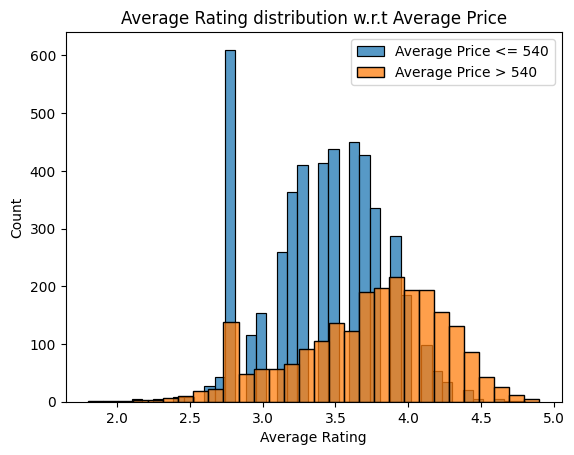

In [31]:
sns.histplot(x = zomato2["rate (out of 5)"][zomato2["avg cost (two people)"] <= 540], label = "Average Price <= 540")
sns.histplot(x = zomato2["rate (out of 5)"][zomato2["avg cost (two people)"] > 540], label = "Average Price > 540")
plt.xlabel("Average Rating")
plt.title("Average Rating distribution w.r.t Average Price")
plt.legend()
plt.savefig("aprice_arate.png")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


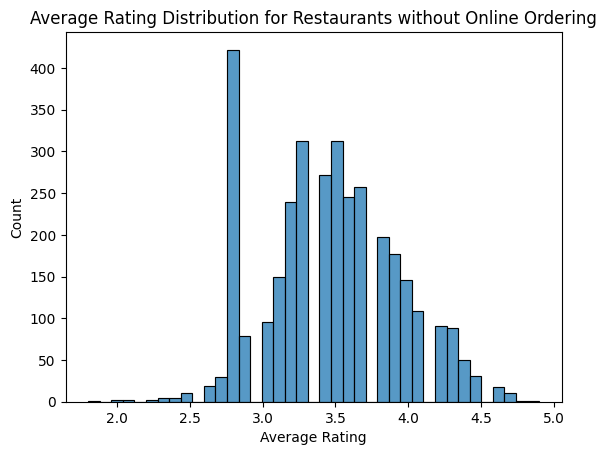

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


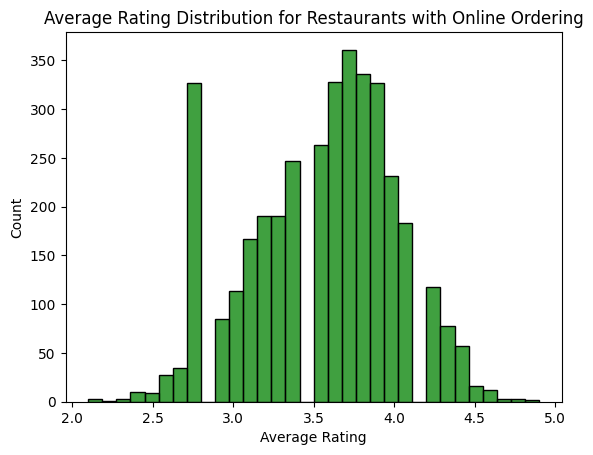

In [32]:
dist = zomato2[["rate (out of 5)", "online_order"]]
sns.histplot(x = "rate (out of 5)", data = zomato2[zomato2["online_order"] == 0]).set(title = "Average Rating Distribution for Restaurants without Online Ordering")
plt.xlabel("Average Rating")
plt.savefig("avrate_offline.png")
plt.show()
sns.histplot(x = "rate (out of 5)", data = zomato2[zomato2["online_order"] == 1], color = "green").set(title = "Average Rating Distribution for Restaurants with Online Ordering")
plt.xlabel("Average Rating")
plt.savefig("avrate_online.png")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


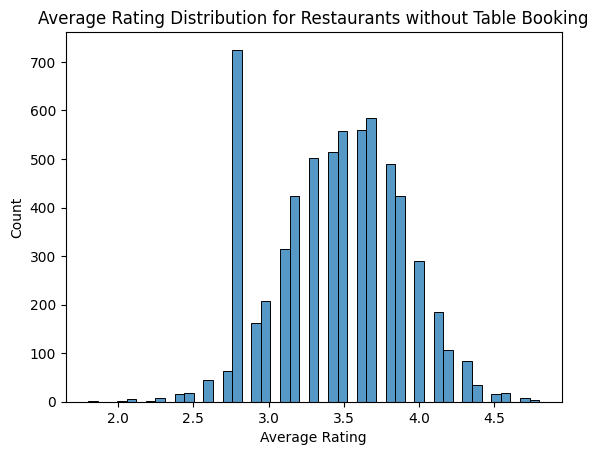

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


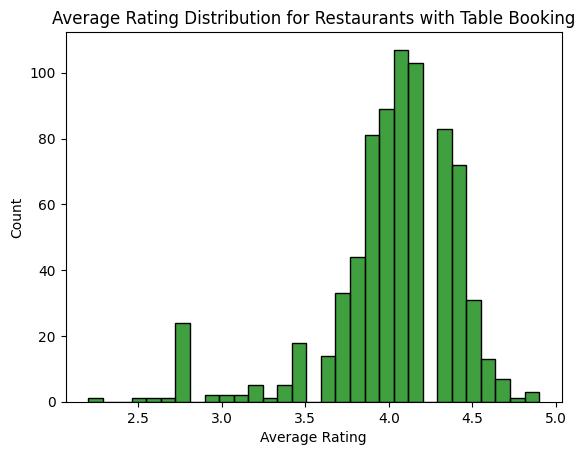

In [33]:
dist = zomato2[["rate (out of 5)", "table booking"]]
sns.histplot(x = "rate (out of 5)", data = zomato2[zomato2["table booking"] == 0]).set(title = "Average Rating Distribution for Restaurants without Table Booking")
plt.xlabel("Average Rating")
plt.savefig("avrate_no_table.png")
plt.show()
sns.histplot(x = "rate (out of 5)", data = zomato2[zomato2["table booking"] == 1], color = "green").set(title = "Average Rating Distribution for Restaurants with Table Booking")
plt.xlabel("Average Rating")
plt.savefig("avrate_table.png")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


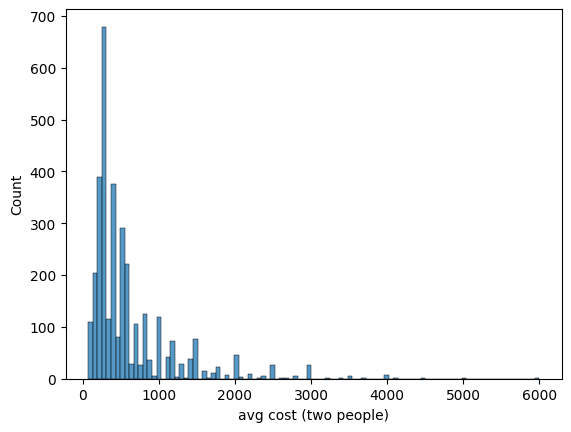

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


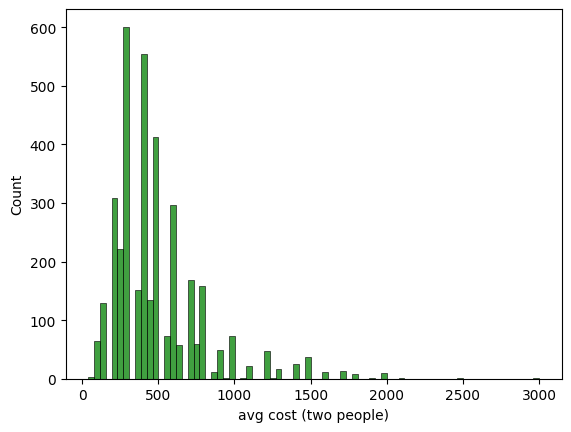

In [34]:
dist = zomato2[["avg cost (two people)", "online_order"]]
sns.histplot(x = "avg cost (two people)", data = zomato2[zomato2["online_order"] == 0])
plt.show()
sns.histplot(x = "avg cost (two people)", data = zomato2[zomato2["online_order"] == 1], color = "green")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


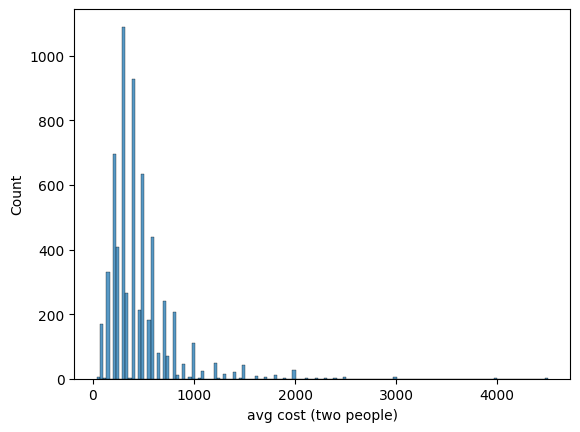

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


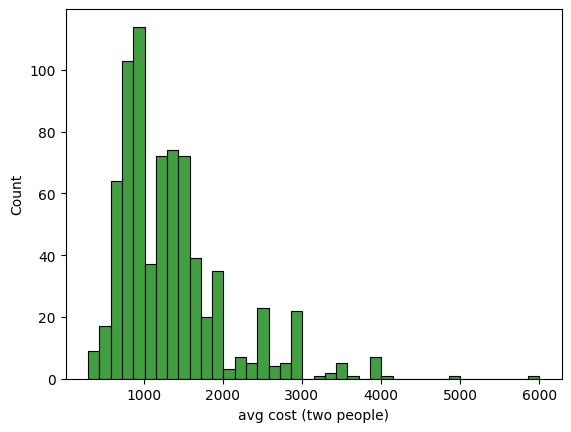

In [35]:
dist = zomato2[["avg cost (two people)", "table booking"]]
sns.histplot(x = "avg cost (two people)", data = zomato2[zomato2["table booking"] == 0])
plt.show()
sns.histplot(x = "avg cost (two people)", data = zomato2[zomato2["table booking"] == 1], color = "green")
plt.show()

348.4444700460829
2500.0
0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


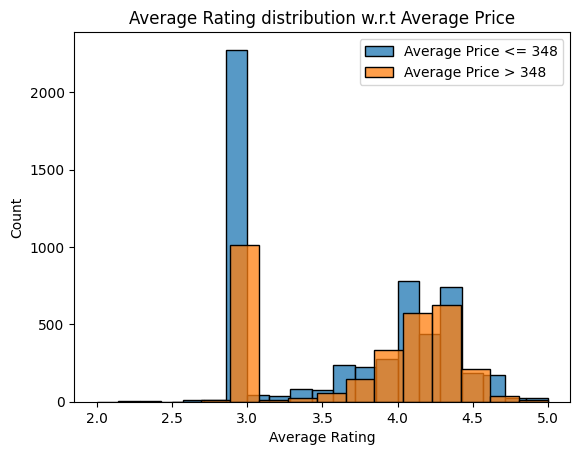

In [36]:
print(swiggy2["Price"].mean())
print(swiggy2["Price"].max())
print(swiggy2["Price"].min())
#sns.scatterplot(y = "Price", x = "Avg ratings", data = swiggy2)
sns.histplot(x = swiggy2["Avg ratings"][swiggy2["Price"] <= 348], label = "Average Price <= 348")
sns.histplot(x = swiggy2["Avg ratings"][swiggy2["Price"] > 348], label = "Average Price > 348")
plt.xlabel("Average Rating")
plt.title("Average Rating distribution w.r.t Average Price")
plt.legend()
plt.savefig("aprice_arate1.png")
plt.show()

# Regression Analysis

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
y = zomato2["rate (out of 5)"]
x = zomato2[["num of ratings", "avg cost (two people)", "online_order", "table booking"]]
model = LinearRegression().fit(x, y)
preds = model.predict(x)
model.score(x, y)

0.2449907631647944

<Axes: xlabel='rate (out of 5)'>

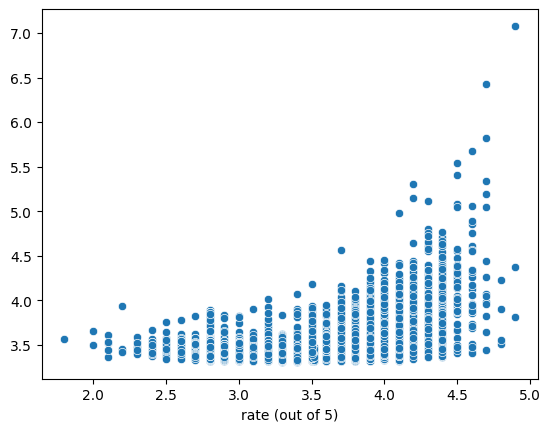

In [39]:
sns.scatterplot(x = y, y = preds)

In [40]:
y = swiggy2["Avg ratings"]
x = swiggy2["Price"].values.reshape((-1, 1))
model = LinearRegression().fit(x, y)
model.score(x, y)

0.012911864691677488

# Geospatial Analysis

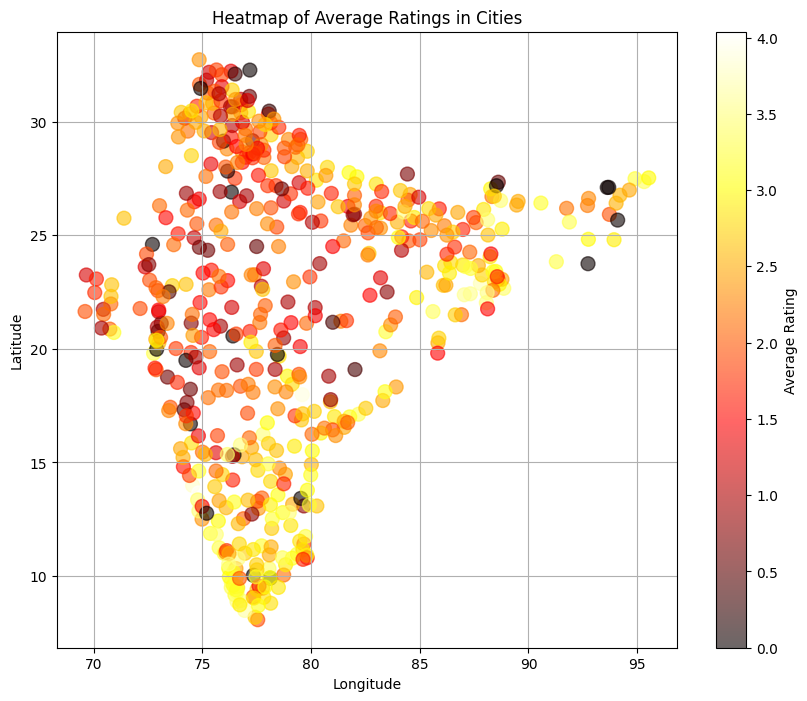

In [41]:
import geopandas as gpd
swiggy1 = swiggy1[swiggy1["Longitude"] > 60]
swiggy1 = swiggy1[swiggy1["Longitude"] < 100]
latitude = swiggy1['Latitude']
longitude = swiggy1['Longitude']
ratings = swiggy1['rating']

india = gpd.read_file('/kaggle/input/india-shx/india_States_level_1.shp')

# Create a scatter plot of latitude and longitude with color representing average ratings
plt.figure(figsize=(10, 8))
india.plot(ax=ax, color='lightgrey')
plt.scatter(longitude, latitude, c=ratings, cmap='hot', s=100, alpha=0.6)
plt.colorbar(label='Average Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Average Ratings in Cities')
plt.grid(True)
plt.savefig("map.png")
plt.show()